In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

颜色空间转换

1 转换颜色空间

In [2]:
flags=[name for name in dir(cv2) if name.startswith('COLOR_')]
print(flags[0:5])

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY']


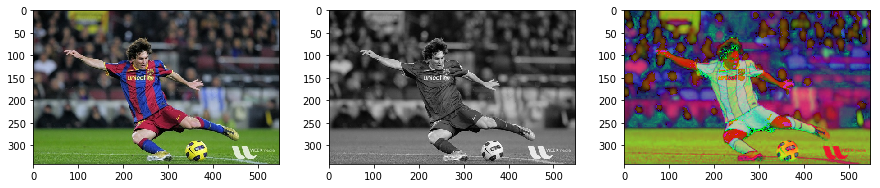

In [3]:
img=cv2.imread('sample.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(15,5))
plt.subplot(131),plt.imshow(img[:,:,::-1])
plt.subplot(132),plt.imshow(img_gray,cmap='gray')
plt.subplot(133),plt.imshow(img_hsv[:,:,::-1])
plt.show()

2 物体跟踪

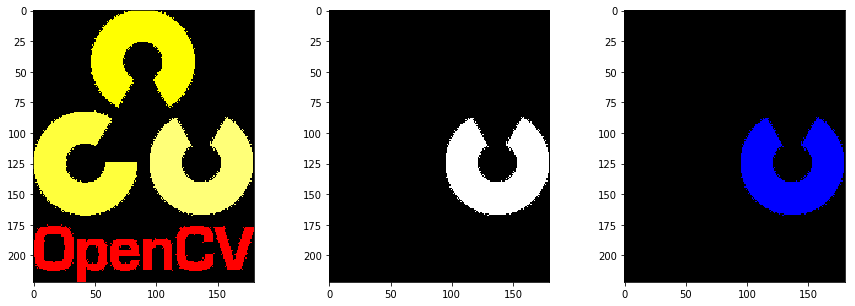

In [4]:
img=cv2.imread('logo.png')
# Convert BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(img,img, mask= mask)

plt.figure(figsize=(15,5))
plt.subplot(131),plt.imshow(hsv[:,:,::-1],cmap='hsv')
plt.subplot(132),plt.imshow(mask,cmap='gray')
plt.subplot(133),plt.imshow(res[:,:,::-1])
plt.show()

3 怎样找到要跟踪对象的 HSV 值

In [5]:
#in function cvtColor
#scn (the number of channels of the source),
#i.e. self.img.channels(), is neither 3 nor 4.
#depth (of the source),
#i.e. self.img.depth(), is neither CV_8U nor CV_32F.
# 所以不能用 [0,255,0] ，而要用 [[[0,255,0]]]
# 这里的三层括号应该分别对应于 cvArray ， cvMat ， IplImage
green=np.uint8([[[0,255,0]]])
hsv_green=cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print(hsv_green)
# [[[60 255 255]]]

[[[ 60 255 255]]]


几何变换

1 扩展缩放

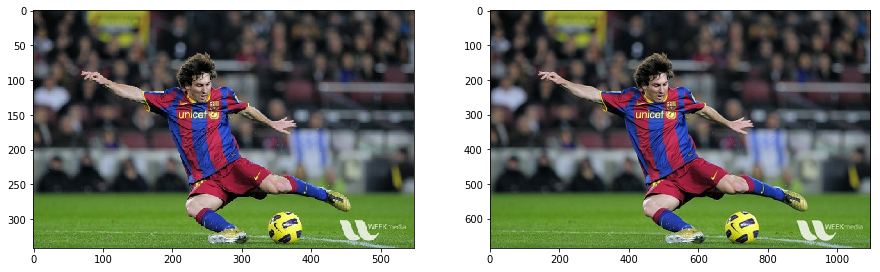

In [6]:
img=cv2.imread('sample.jpg')
# 下面的 None 本应该是输出图像的尺寸，但是因为后边我们设置了缩放因子
# 因此这里为 None
res=cv2.resize(img,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
#OR
# 这里呢，我们直接设置输出图像的尺寸，所以不用设置缩放因子
height,width=img.shape[:2]
res=cv2.resize(img,(2*width,2*height),interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(15,5))
plt.subplot(121),plt.imshow(img[:,:,::-1])
plt.subplot(122),plt.imshow(res[:,:,::-1])
plt.show()

2 平移

(342, 548)


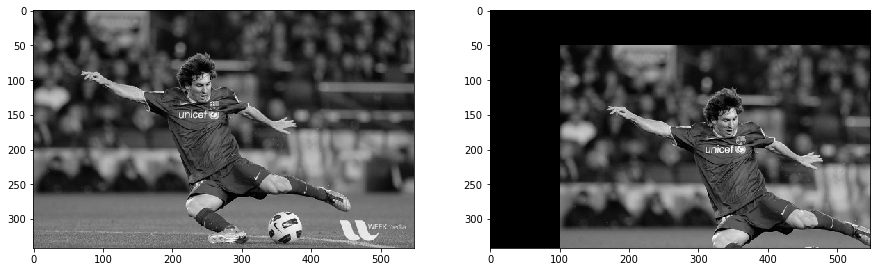

In [7]:
img = cv2.imread('sample.jpg',0)
rows,cols = img.shape
print(img.shape)

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(15,5))
plt.subplot(121),plt.imshow(img,cmap='gray')
plt.subplot(122),plt.imshow(dst,cmap='gray')
plt.show()

3 旋转

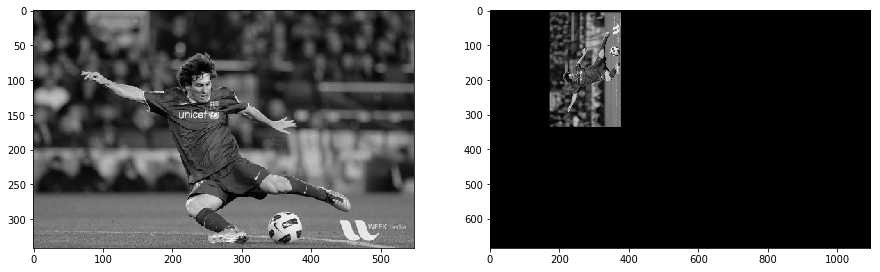

In [8]:
img = cv2.imread('sample.jpg',0)
rows,cols=img.shape
# 这里的第一个参数为旋转中心，第二个为旋转角度，第三个为旋转后的缩放因子
# 可以通过设置旋转中心，缩放因子，以及窗口大小来防止旋转后超出边界的问题
M=cv2.getRotationMatrix2D((cols/2,rows/2),90,0.6)
# 第三个参数是输出图像的尺寸中心
dst=cv2.warpAffine(img,M,(2*cols,2*rows))

plt.figure(figsize=(15,5))
plt.subplot(121),plt.imshow(img,cmap='gray')
plt.subplot(122),plt.imshow(dst,cmap='gray')
plt.show()

4 仿射变换

(342, 548, 3)


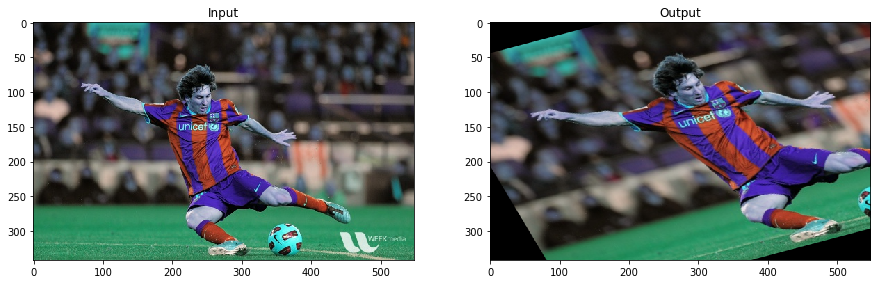

In [9]:
img = cv2.imread('sample.jpg')
print(img.shape)
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(15,5))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

5 透视变换

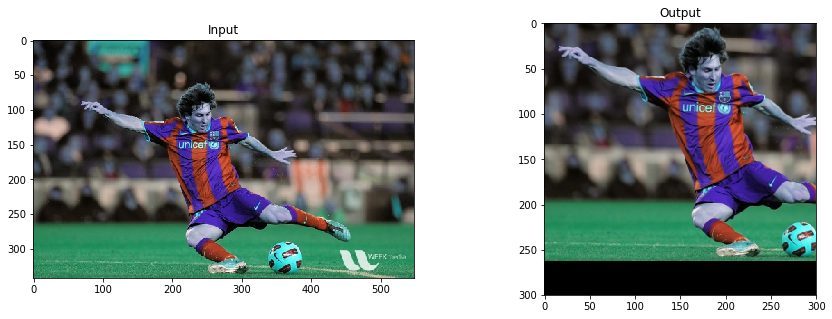

In [10]:
img = cv2.imread('sample.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.figure(figsize=(15,5))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

图像阈值

1 简单阈值

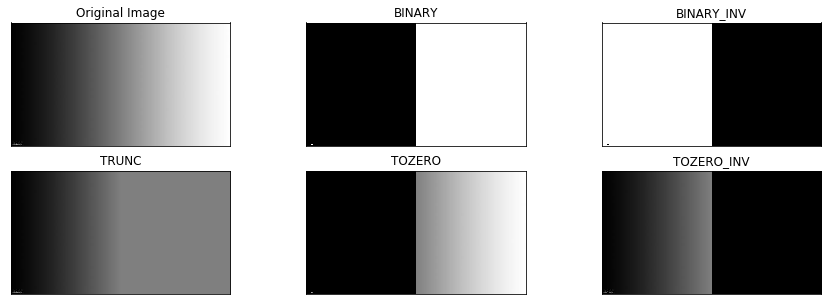

In [11]:
img=cv2.imread('gradient.jpg')
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15,5))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

2 自适应阈值

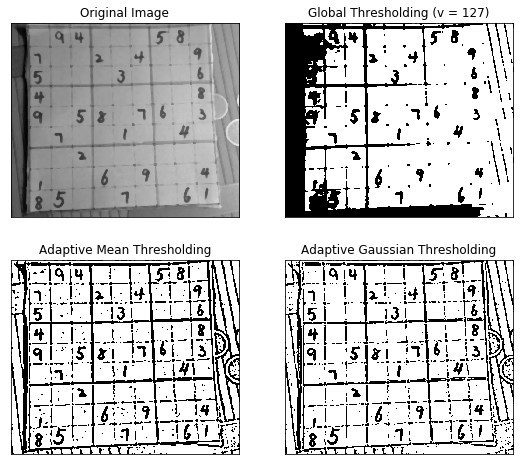

In [3]:
img = cv2.imread('sudokusmall.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(9,8))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()



3 Otsu's 二值化

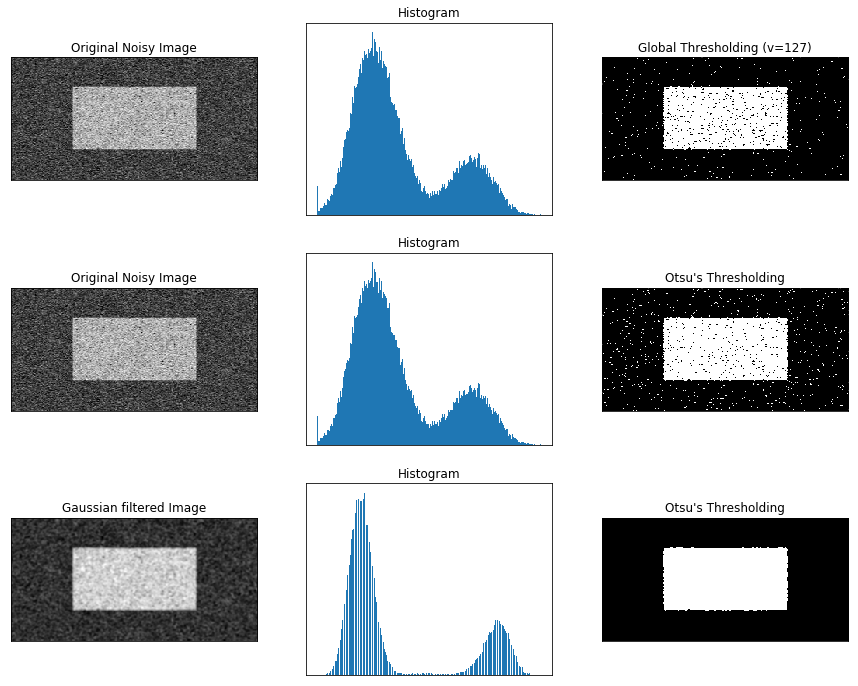

In [13]:
img = cv2.imread('noisy2.jpg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize=(15,12))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()